In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df = pd.read_csv('Housing.csv')

In [6]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# data cleaning

In [7]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

**NO null values found in data_set**

In [8]:
df.duplicated().sum() # check duplicate values

0

In [9]:
df.info()  # all information about data_set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [10]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


## Explore the dataset to understand its structure, handle missing values, and ensure data quality.

In [11]:
# Select only numerical features 
numerical_features = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
df_numerical = df[numerical_features]

In [12]:
target_variable = 'price'

In [13]:
# Separate the target variable from the rest of the dataset
X = df_numerical.drop(target_variable, axis=1)
y = df_numerical[target_variable]


In [18]:
# Correlation Matrix
correlation_matrix = df_numerical.corr()

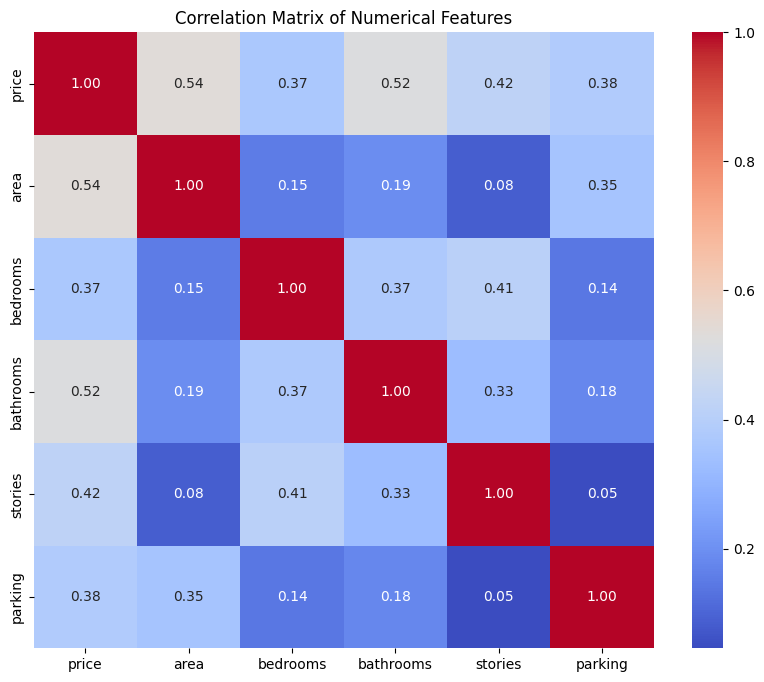

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [20]:
# Identify features with high correlation with the target variable
correlated_features = correlation_matrix[target_variable].sort_values(ascending=False)
print("Correlation with Target Variable:")
print(correlated_features)

Correlation with Target Variable:
price        1.000000
area         0.535997
bathrooms    0.517545
stories      0.420712
parking      0.384394
bedrooms     0.366494
Name: price, dtype: float64


## Model Training: Implement linear regression using a machine learning library

## Feature Selection: Identify relevant features that may contribute to the predictive model

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [24]:
# Get feature importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False, inplace=True)

In [26]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

In [27]:

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

## Evaluate the model's performance on a separate test dataset using metrics such as Mean Squared Error or R-squared.

In [28]:
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 2593438212040.279
R-squared: 0.48691222287234903


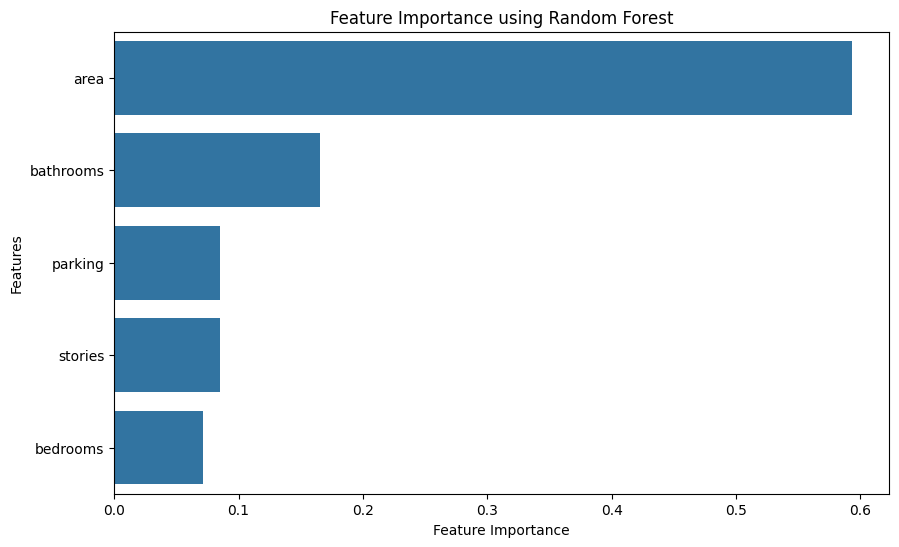

In [25]:
# Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Feature Importance using Random Forest")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.show()

## Visualization: Create visualizations to illustrate the relationship between the predicted and actual values.

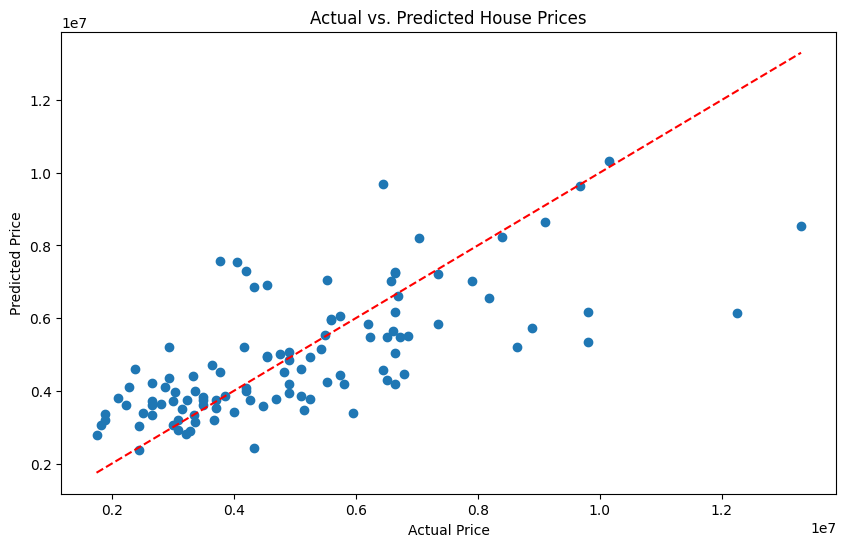

In [31]:
# Visualization: Predicted vs. Actual Values

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted House Prices")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Add a diagonal line for perfect prediction
plt.show()


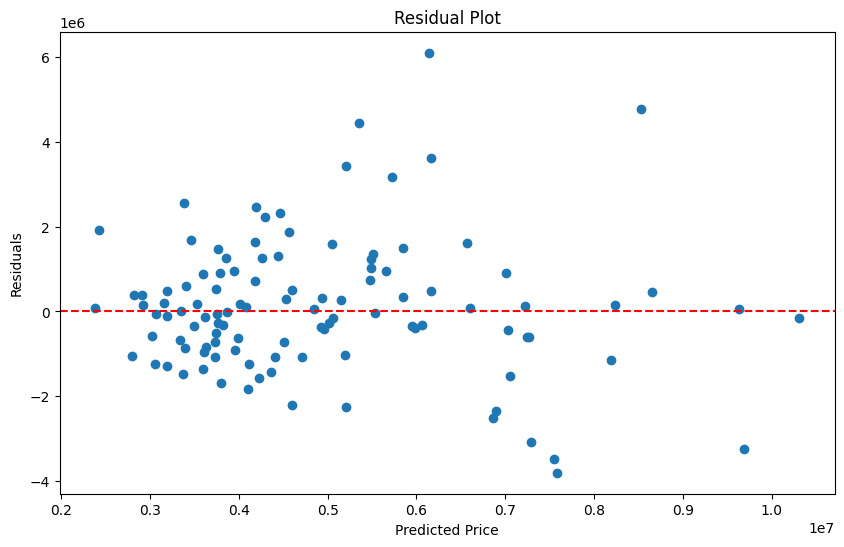

In [32]:
# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at y=0
plt.show()

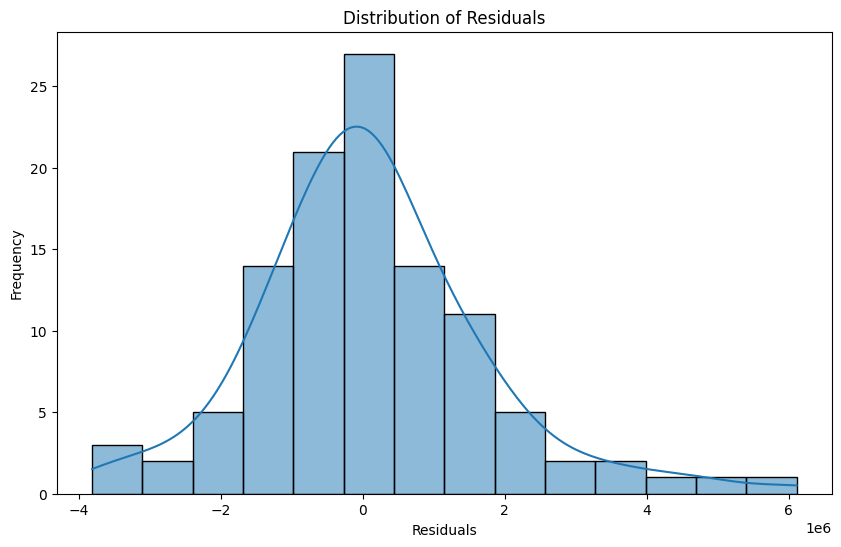

In [33]:
# Distribution of Residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

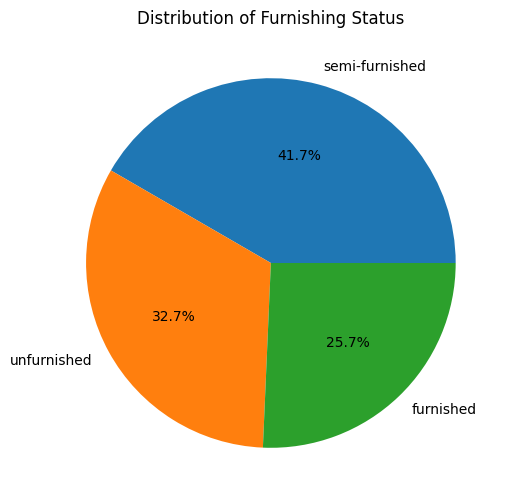

In [34]:
plt.figure(figsize=(8, 6))
plt.pie(df['furnishingstatus'].value_counts(), labels=df['furnishingstatus'].value_counts().index, autopct='%1.1f%%')
_ = plt.title('Distribution of Furnishing Status')

# Analysis Report

**The dataset contains information about housing prices and various features that could influence them, such as area, number of bedrooms, bathrooms, stories, and parking facilities.  It includes both numerical and categorical features.**


**Price Distribution:** **The price variable exhibits describe the price distribution, e.g., a wide range of values, potential skewness.**
* **Furnishing Status:** The dataset shows that mention the insights about furnishing status from the pie chart, e.g., most houses are semi-furnished.
* **Correlation Analysis:**  The heatmap reveals correlations between different numerical features. Notably,mention the key correlations found in the heatmap, e.g., area and price have a strong positive correlation.
* **Feature Importance:** The Random Forest model highlights the key features influencing price.Mention the top 3-4 features highlighted by feature importance, e.g., 'area', 'bedrooms', and 'bathrooms' are considered significant predictors.



## Predictive Model

A linear regression model was trained to predict house prices based on selected features.

**Model Performance:**

* **Mean Squared Error (MSE):** The MSE indicates the average squared difference between predicted and actual prices. A lower MSE suggests better performance. The model achieved an MSE of mention the MSE value obtained.
* **R-squared:** The R-squared value signifies the proportion of variance in the target variable that is explained by the model. A higher R-squared generally indicates a better fit. The model achieved an R-squared of mention the R-squared value obtained.

**Model Insights:**

* **Coefficients:** The coefficients of the linear regression model reveal the impact of each feature on the predicted price.  mention the significant coefficients and their interpretations, e.g., a positive coefficient for 'area' implies that an increase in area is associated with a higher predicted price.
* **Residual Analysis:** The residual plot and distribution of residuals help assess the model's assumptions and identify potential areas for improvement. Mention the insights from the plots, e.g., If residuals are randomly scattered around zero, it indicates good model fit; if there's a pattern, it might suggest limitations of the model.



## Conclusion

**The linear regression model offers a relatively good prediction of house prices based on the provided features. The model's performance can be further enhanced by exploring different model architectures (e.g., polynomial regression, tree-based models), fine-tuning hyperparameters, addressing potential outliers, and feature engineering.**

# download cleaned data_set

In [35]:
df_cleaned = df.to_csv('cleaned_data_Housing.csv', index=False)